In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("TATA Mar-25 CSI.csv")

In [4]:
df.head(2)

,SA Professional Approach,SA Friendliness,SA Product Know.,On The Promised Time,Completed First Time,SA Explain The Work,Cleaned Properly,Overall Evaluation,Satisfaction,Concern Y /N,NP Score,ADVISOR NAME
0,0,0,0.0,0,0,0,0,0,Not Satisfied,Yes,0,SANDALI PEIRIS
1,7,7,8.0,3,3,0,0,5,Not Satisfied,Yes,0,UMESH SABARAGAMUWA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SA Professional Approach  239 non-null    int64  
 1   SA Friendliness           239 non-null    int64  
 2   SA Product Know.          238 non-null    float64
 3   On The Promised Time      239 non-null    int64  
 4   Completed First Time      239 non-null    int64  
 5   SA Explain The Work       239 non-null    int64  
 6   Cleaned Properly          239 non-null    int64  
 7   Overall Evaluation        239 non-null    int64  
 8   Satisfaction              239 non-null    object 
 9   Concern Y /N              239 non-null    object 
 10  NP Score                  239 non-null    object 
 11  ADVISOR NAME              239 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 22.5+ KB


# Regression Model

### Target Variable = "Overall Evaluation"

In [6]:
df.isnull().sum()

SA Professional Approach    0
SA Friendliness             0
SA Product Know.            1
On The Promised Time        0
Completed First Time        0
SA Explain The Work         0
Cleaned Properly            0
Overall Evaluation          0
Satisfaction                0
Concern Y /N                0
NP Score                    0
ADVISOR NAME                0
dtype: int64

In [7]:
data_cleaned = df.dropna()

In [8]:
data_cleaned.isnull().sum()

SA Professional Approach    0
SA Friendliness             0
SA Product Know.            0
On The Promised Time        0
Completed First Time        0
SA Explain The Work         0
Cleaned Properly            0
Overall Evaluation          0
Satisfaction                0
Concern Y /N                0
NP Score                    0
ADVISOR NAME                0
dtype: int64

In [9]:
data_cleaned.shape

(238, 12)

### Check Correlation

In [112]:
Num_data = data_cleaned.select_dtypes(include='number')

In [114]:
Num_data.corr()['Overall Evaluation']

SA Professional Approach    0.477447
SA Friendliness             0.475147
SA Product Know.            0.514056
On The Promised Time        0.644198
Completed First Time        0.731067
SA Explain The Work         0.557975
Cleaned Properly            0.517793
Overall Evaluation          1.000000
Name: Overall Evaluation, dtype: float64

In [10]:
# Assuming your DataFrame is named df
X = data_cleaned.iloc[:, 0:7]  # Select columns 0 to 6
Y = data_cleaned['Overall Evaluation']  # Select the 'Overall Evaluation' column


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SA Professional Approach  238 non-null    int64  
 1   SA Friendliness           238 non-null    int64  
 2   SA Product Know.          238 non-null    float64
 3   On The Promised Time      238 non-null    int64  
 4   Completed First Time      238 non-null    int64  
 5   SA Explain The Work       238 non-null    int64  
 6   Cleaned Properly          238 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 14.9 KB


In [12]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 238 entries, 0 to 238
Series name: Overall Evaluation
Non-Null Count  Dtype
--------------  -----
238 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [14]:
def model_acc(model):
    model.fit(X_train,y_train)
    acc = model.score(X_test,y_test)
    print(str(model)+":"+str(acc))

In [15]:
# OLS
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

# ElasticNet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
model_acc(elastic)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression():0.454557813114435
Lasso():0.5348051929912501
ElasticNet():0.5811551449425941
RandomForestRegressor():0.3248350516894132


# Elastic Net Regerssion 

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
def model_summary(model, X_train, y_train, X_test, y_test):
    """
    Fits the ElasticNet model and prints a detailed summary of the model, including
    intercept, coefficients, alpha, l1_ratio, R² score, MSE, and visualizations of feature importance.
    
    Parameters:
    - model: The ElasticNet model object.
    - X_train: Features of the training dataset.
    - y_train: Target labels of the training dataset.
    - X_test: Features of the test dataset.
    - y_test: Target labels of the test dataset.
    
    Prints model details, performance metrics, and visualizations.
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get the intercept and coefficients
    intercept = model.intercept_
    coefficients = model.coef_
    
    # Get model hyperparameters
    alpha = model.alpha
    l1_ratio = model.l1_ratio
    
    # Get feature names from X_train
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R² score and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print model summary
    print(f"ElasticNet Model Summary:")
    print(f"Intercept: {intercept}")
    print(f"Coefficients: {coefficients}")
    print(f"Alpha (regularization strength): {alpha}")
    print(f"L1 ratio (balance between Lasso and Ridge): {l1_ratio}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    
    # Plot Feature Importance (Coefficients)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(coefficients)), coefficients, color='skyblue')
    plt.title("Feature Importance (ElasticNet Coefficients)")
    plt.xlabel("Feature Name")
    plt.ylabel("Coefficient Value")
    
    # Set x-axis to feature names
    plt.xticks(range(len(coefficients)), feature_names, rotation=90)
    plt.show()


ElasticNet Model Summary:
Intercept: 3.756497355055968
Coefficients: [0.         0.         0.00496039 0.13813091 0.2929012  0.04298919
 0.09102961]
Alpha (regularization strength): 1.0
L1 ratio (balance between Lasso and Ridge): 0.5
R² Score: 0.5812
Mean Squared Error: 0.7941


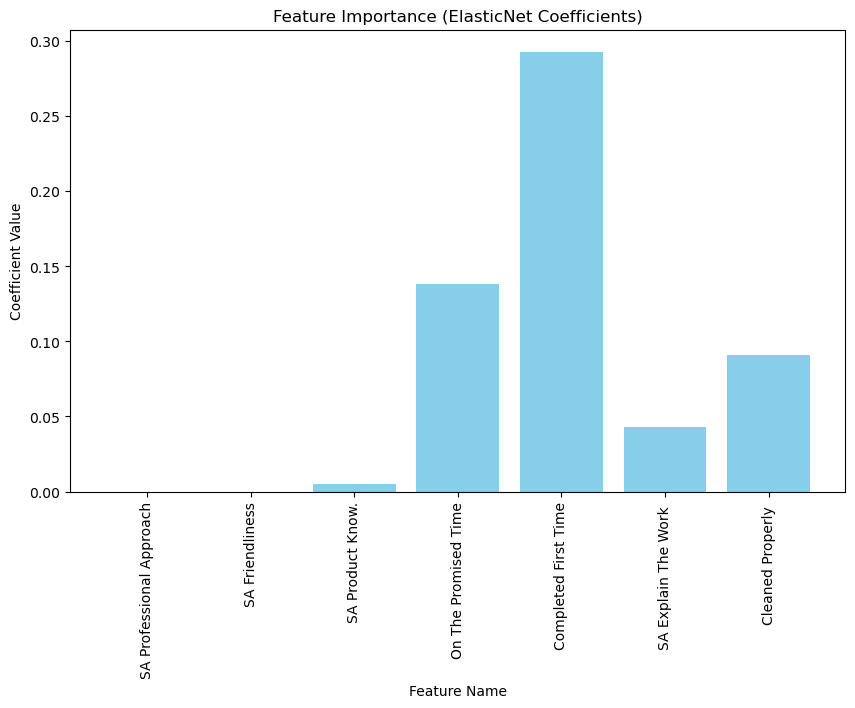

In [18]:
model_summary(elastic, X_train, y_train, X_test, y_test)

## Model Fitting after removing "SA Professional Approach", "SA Friendliness", "SA Product Know."

In [19]:
X_new = data_cleaned.iloc[:, 3:7]  # Select columns 0 to 6
Y = data_cleaned['Overall Evaluation']  # Select the 'Overall Evaluation' column

In [20]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 238
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   On The Promised Time  238 non-null    int64
 1   Completed First Time  238 non-null    int64
 2   SA Explain The Work   238 non-null    int64
 3   Cleaned Properly      238 non-null    int64
dtypes: int64(4)
memory usage: 9.3 KB


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, Y, test_size=0.2, random_state=42
)

In [22]:
elastic = ElasticNet()

ElasticNet Model Summary:
Intercept: 3.772011114636495
Coefficients: [0.13874356 0.2947682  0.04342615 0.09133478]
Alpha (regularization strength): 1.0
L1 ratio (balance between Lasso and Ridge): 0.5
R² Score: 0.5814
Mean Squared Error: 0.7936


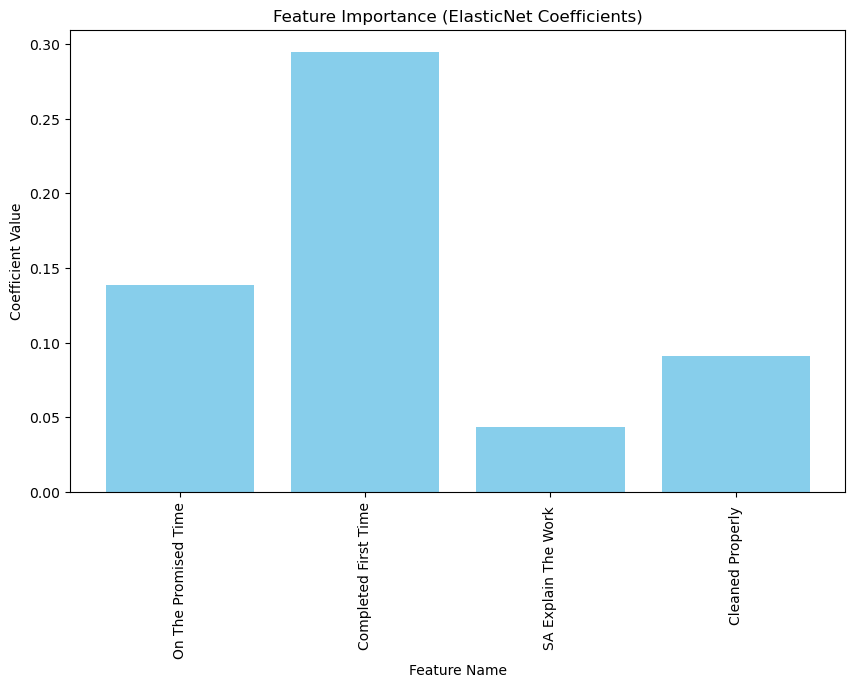

In [24]:
model_summary(elastic, X_train, y_train, X_test, y_test)

# Classification 

### Target Variable = "Satisfaction"

In [48]:
data_classi = df[['How Satisfied Are You Service Advisors Professional Approach','How Satisfied Are You Service Advisors Attitude And Friendliness','How Satisfied Are You Service Advisors Product Knowledge','Was Your Vehicle Prepared On The Promised Time','Was All The Ordered Work Completed First Time','Did The Service Advisor Explain The Work Carried Out','Was Your Vehicle Cleaned Properly After Repairs Internally Externally','Your Overall Evaluation Of Our Services','Satisfaction']]

In [49]:
data_classi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   How Satisfied Are You Service Advisors Professional Approach           239 non-null    int64  
 1   How Satisfied Are You Service Advisors Attitude And Friendliness       239 non-null    int64  
 2   How Satisfied Are You Service Advisors Product Knowledge               238 non-null    float64
 3   Was Your Vehicle Prepared On The Promised Time                         239 non-null    int64  
 4   Was All The Ordered Work Completed First Time                          239 non-null    int64  
 5   Did The Service Advisor Explain The Work Carried Out                   239 non-null    int64  
 6   Was Your Vehicle Cleaned Properly After Repairs Internally Externally  239 non-null    int6

In [50]:
data_classi.isnull().sum()

How Satisfied Are You Service Advisors Professional Approach             0
How Satisfied Are You Service Advisors Attitude And Friendliness         0
How Satisfied Are You Service Advisors Product Knowledge                 1
Was Your Vehicle Prepared On The Promised Time                           0
Was All The Ordered Work Completed First Time                            0
Did The Service Advisor Explain The Work Carried Out                     0
Was Your Vehicle Cleaned Properly After Repairs Internally Externally    0
Your Overall Evaluation Of Our Services                                  0
Satisfaction                                                             0
dtype: int64

In [51]:
data_classi_cleaned = data_classi.dropna()

In [52]:
data_classi_cleaned.isnull().sum()

How Satisfied Are You Service Advisors Professional Approach             0
How Satisfied Are You Service Advisors Attitude And Friendliness         0
How Satisfied Are You Service Advisors Product Knowledge                 0
Was Your Vehicle Prepared On The Promised Time                           0
Was All The Ordered Work Completed First Time                            0
Did The Service Advisor Explain The Work Carried Out                     0
Was Your Vehicle Cleaned Properly After Repairs Internally Externally    0
Your Overall Evaluation Of Our Services                                  0
Satisfaction                                                             0
dtype: int64

In [53]:
data_classi_cleaned.shape

(238, 9)

In [63]:
X = data_classi_cleaned[['How Satisfied Are You Service Advisors Professional Approach','How Satisfied Are You Service Advisors Attitude And Friendliness','How Satisfied Are You Service Advisors Product Knowledge','Was Your Vehicle Prepared On The Promised Time','Was All The Ordered Work Completed First Time','Did The Service Advisor Explain The Work Carried Out','Was Your Vehicle Cleaned Properly After Repairs Internally Externally','Your Overall Evaluation Of Our Services']]
Y = data_classi_cleaned['Satisfaction']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [68]:
# Logistic Regression (multi-class by default)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='auto')
model_acc(logreg)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_acc(knn)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model_acc(tree)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
model_acc(extra)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_acc(gbc)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model_acc(ada)

# Bagging
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
model_acc(bagging)

# HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
model_acc(hgb)

# Support Vector Machine
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovr')  # or 'ovo'
model_acc(svc)

# Linear SVM
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
model_acc(lsvc)

# Naive Bayes - Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_acc(gnb)

# Naive Bayes - Multinomial
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
model_acc(mnb)

# Naive Bayes - Complement
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
model_acc(cnb)

# Naive Bayes - Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
model_acc(bnb)

# Neural Network (MLP)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
model_acc(mlp)

# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
model_acc(qda)

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
model_acc(lda)

c:\Users\supun.bandara\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\supun.bandara\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='auto'):0.8125
KNeighborsClassifier():0.8125
DecisionTreeClassifier():0.7916666666666666
RandomForestClassifier():0.8333333333333334
ExtraTreesClassifier():0.8333333333333334
GradientBoostingClassifier():0.7916666666666666
AdaBoostClassifier():0.5208333333333334
BaggingClassifier():0.8125
HistGradientBoostingClassifier():0.8125
SVC():0.8541666666666666
LinearSVC():0.5833333333333334
GaussianNB():0.8958333333333334
MultinomialNB():0.5
ComplementNB():0.4791666666666667
BernoulliNB():0.5
MLPClassifier():0.5208333333333334
QuadraticDiscriminantAnalysis():0.2708333333333333
LinearDiscriminantAnalysis():0.6041666666666666


c:\Users\supun.bandara\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\supun.bandara\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\supun.bandara\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\supun.bandara\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\su